# 1.Frame the problem and look at the big picture

## In this End-to-End machine learning project we are going to be looking at a dataset of house prices in Iowa, and applying machine learning models to find the best fit and then fine-tune it.


In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [6]:
# lists the files in the folder
import os
print(os.listdir("data1"))

['.DS_Store', 'test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']


In [7]:
#Reads in the csv-files and creates a dataframe using pandas

train = pd.read_csv('data1/train.csv')
test = pd.read_csv('data1/test.csv')
sampleSubmission = pd.read_csv('data1/sample_submission.csv')

# Get the Data

### We used the functions head, column, info and describe on the data to get information. The head function gave us some information about the houses such as Area and Saleprice, but there were 81 attributes so not all the information was able to be shown well. By using the column function we can see what all attributes are and this gives us a good indicator as to what attributes we potentially should focus on in our model. When using the info function we could see that some attributes had very many instances with null values, for example Alley with only 81 non-null values and PoolQC with 7 non-null values. This is something we need to look at later. In the describe function we can see the mean, min and max as well as the standard deviation and the 25, 50 and 75 percentiles. This gives us a potential range for prices in the area. We can see from the data that the last house built in the area is from 2010. This is quite some time ago and there may be several reasons for this. Either our data can be outdated or no new houses have been built there since 2010. This could make our model a bit inaccurate.

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
dfId = df.Id

## 3. Discover and visualize the data to gain insights

###  In this step we are supposed to get to know our data by visualizing it in different ways. We used the seaborn and matplotlib libraries for this step. We decided to use a heatmap to check the correlations between the attributes. Since this amount of visual data is too big and visually confusing, we decided to reduce the amount of attributes to the 10 most relevant attributes in correlation to the Saleprice. We saw that the attritube that correlated the most to Saleprice was the OverallQual of the house

<AxesSubplot:>

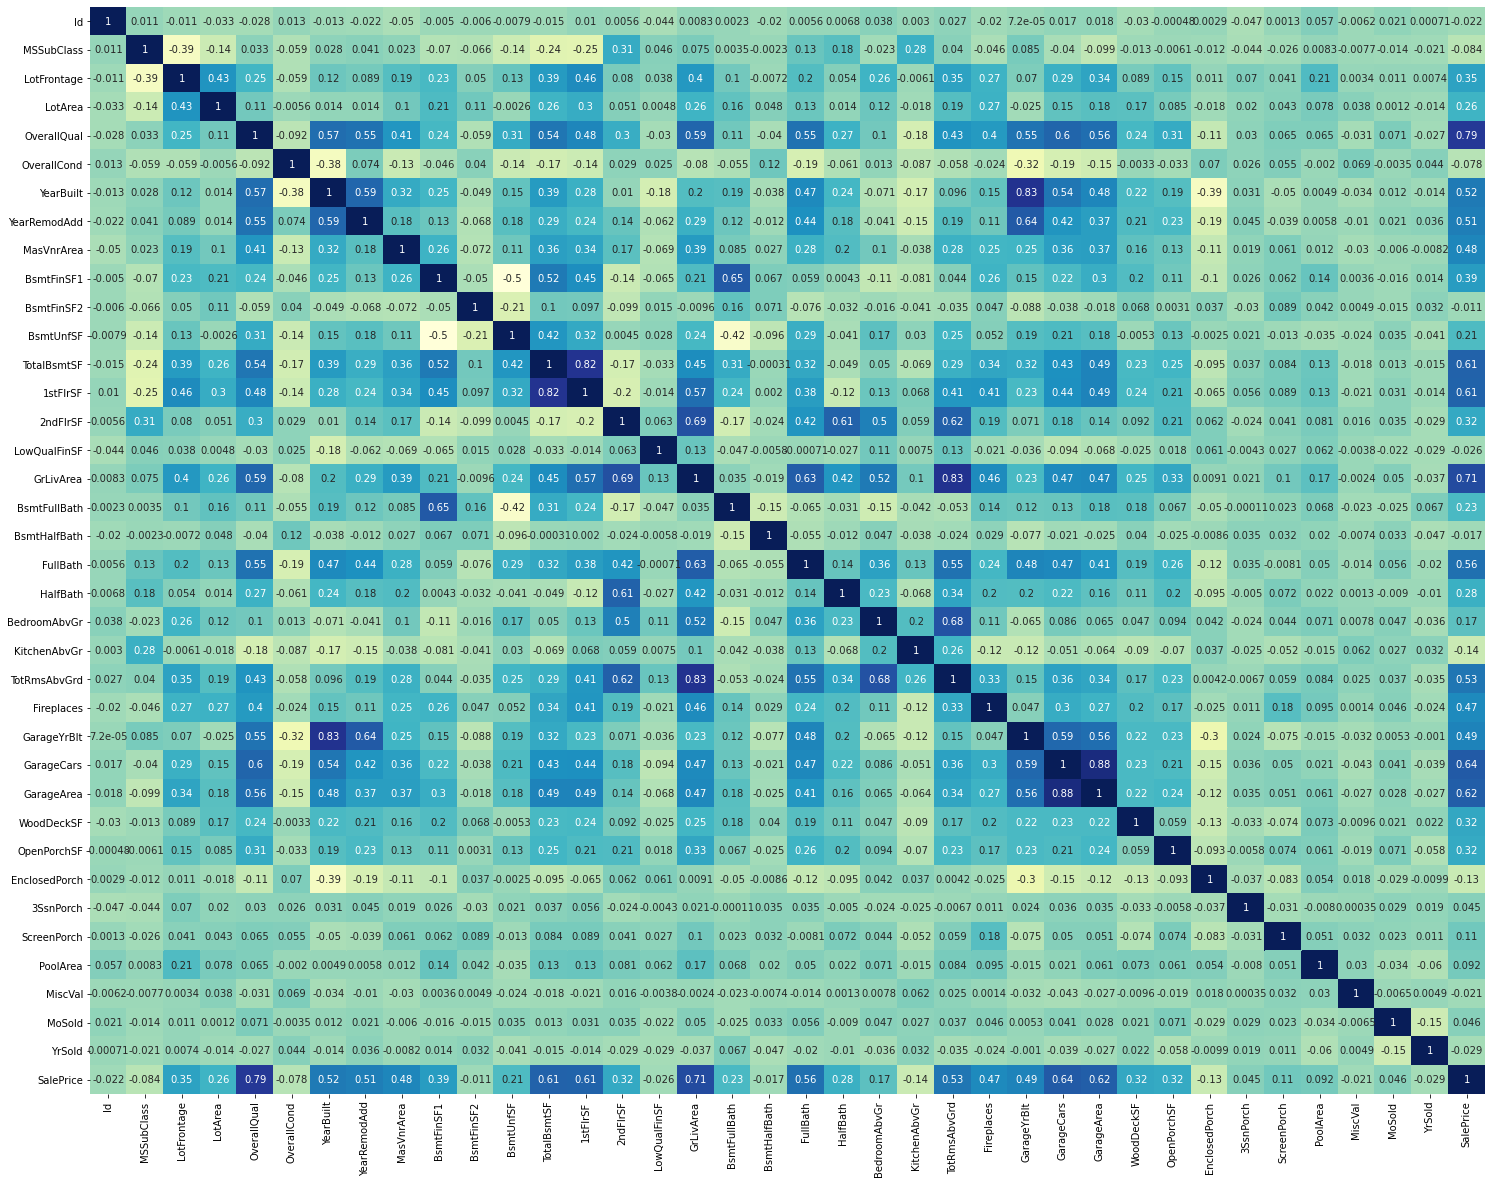

In [13]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap="YlGnBu" )

In [14]:

k = 10
sale_corr_cols = df.corr().nlargest(k,'SalePrice')['SalePrice'].index

<AxesSubplot:>

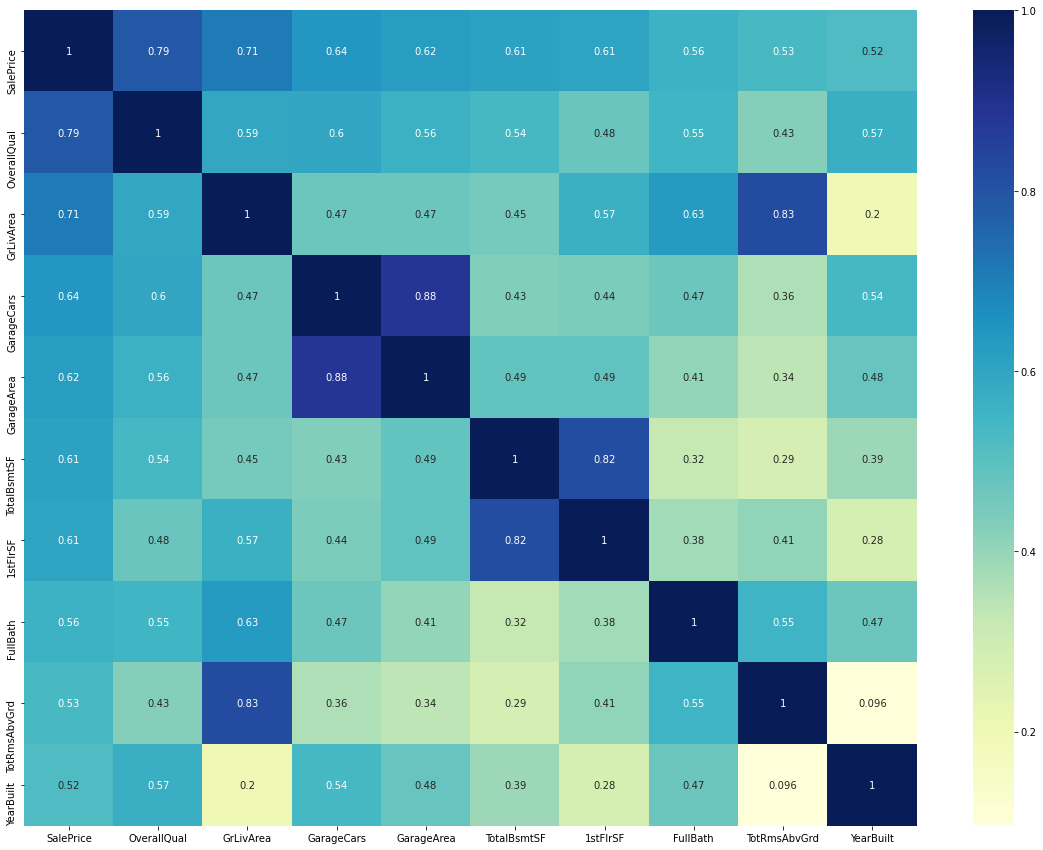

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df[sale_corr_cols].corr(),annot=True, cmap="YlGnBu")

### Now the visual is better, and we can tell  that Salesprice and OverallQul are correlated.

## Frequency of occurance on all objects in dataframe

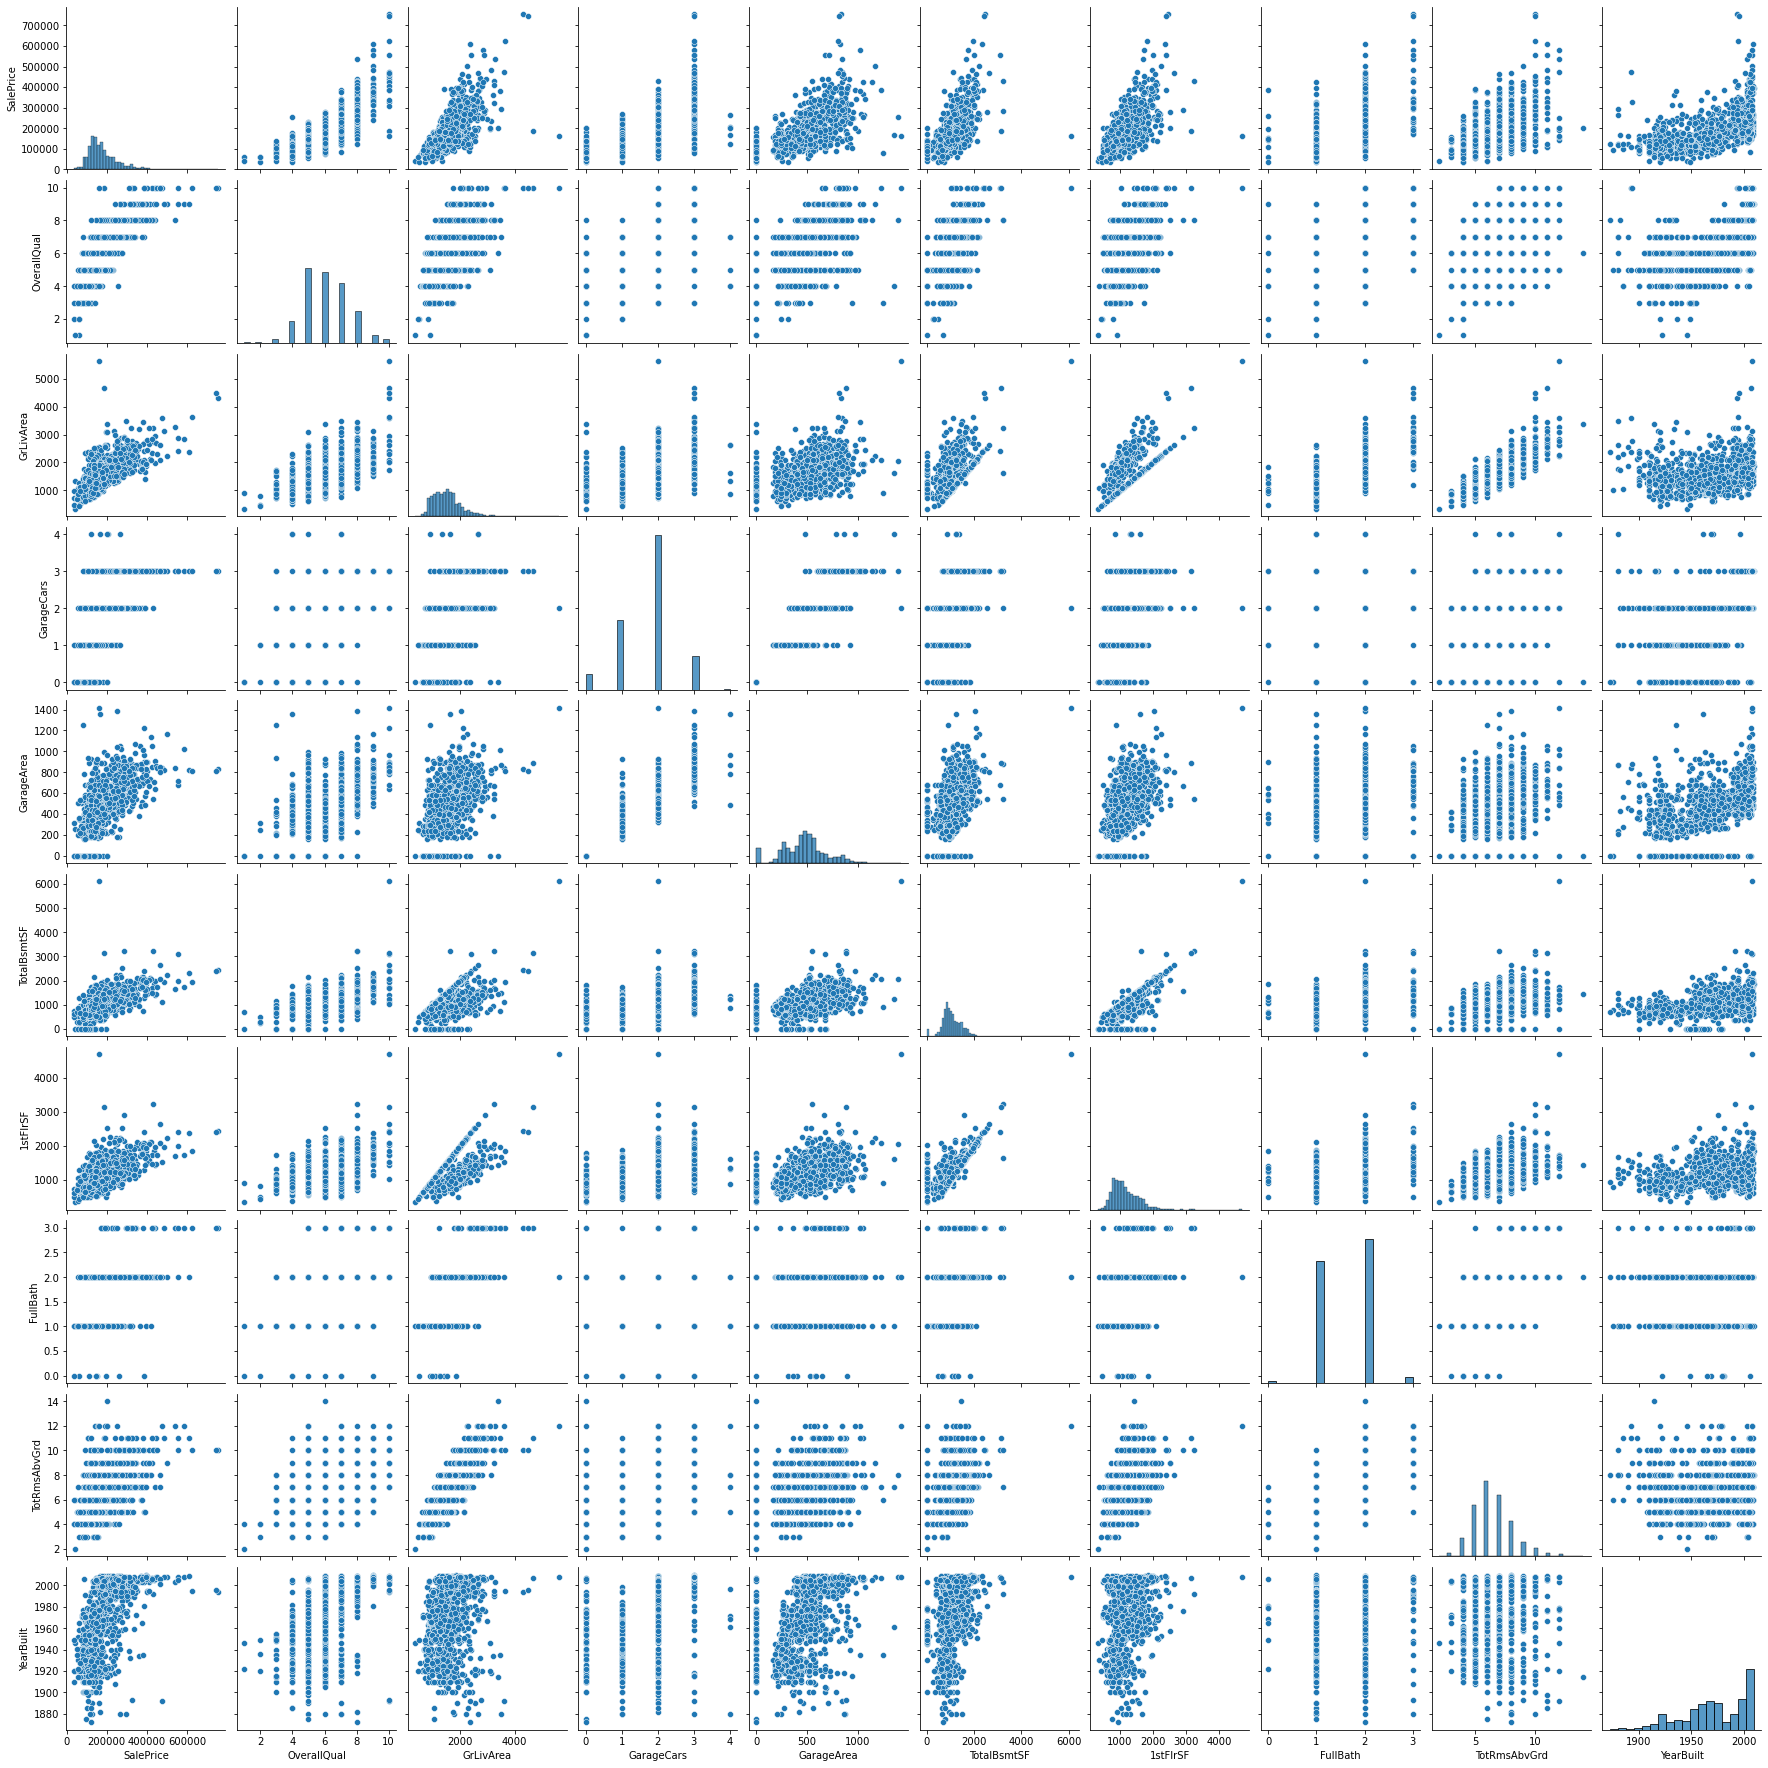

In [19]:
sns.pairplot(df[sale_corr_cols])

### Now we will get better display of some of the scatterplots

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

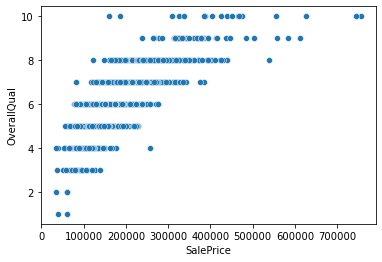

In [20]:
sns.scatterplot('SalePrice', 'OverallQual', data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

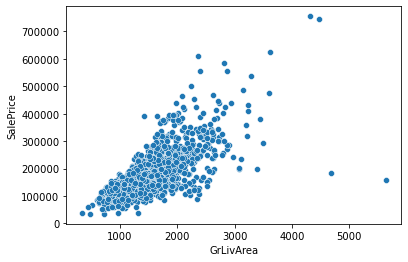

In [21]:
sns.scatterplot('GrLivArea', 'SalePrice', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

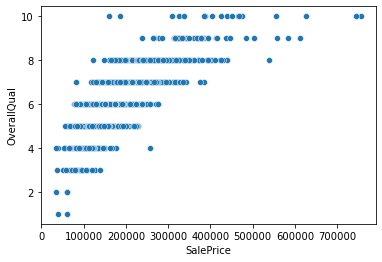

In [22]:
sns.scatterplot('SalePrice', 'OverallQual', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>

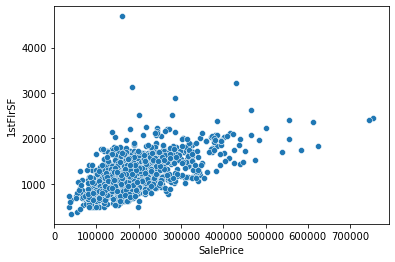

In [23]:
sns.scatterplot('SalePrice', '1stFlrSF', data=df)

# 4. Prepare the data for Machine Learning algorithms

In [25]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### Now that we have all columns with missing values in a dataframe, let's drop all the columns with more than one value missing and one missing entry value in the 'Electrical' column 

In [26]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

0

### Using the Pandas Get dummies function to handle values  with 'Object' as dataype. This is to check the type of output by use Pandas

In [27]:
pd.get_dummies(df).shape

(1459, 222)

In [28]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

### Now we combine all the data about  squarefeet

In [29]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


### We will split the dataset into validation- and a traningse-set using the stratified split with train_test_split

In [30]:
#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SalePrice', axis=1), df.SalePrice, stratify=df.OverallQual, test_size=0.1, random_state=42)
#df['OverallQual'] = df['OverallQual'].astype(str)
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
#for train_index, test_index in split.split(df, df['OverallQual']):
#    strat_train_set = df.loc[train_index]
#    strat_test_set = df.loc[test_index]

### Verifying that the split was somewhat accurate. Here I could have used the train_test_split function from scikit-learn, but given that the trainingset is so small it will probably be better to strategically split the data so that the training and test sets have approximately the same amount of entries in them of the attribute most correlated with the saleprice

In [32]:
df["OverallQual"].value_counts() / len(df)

5     0.271419
6     0.256340
7     0.218643
8     0.115147
4     0.079507
9     0.029472
3     0.013708
10    0.012337
2     0.002056
1     0.001371
Name: OverallQual, dtype: float64

In [34]:
X_train['OverallQual'].value_counts() / len(X_train)

5     0.271135
6     0.256664
7     0.218583
8     0.115004
4     0.079208
9     0.029703
3     0.013709
10    0.012186
2     0.002285
1     0.001523
Name: OverallQual, dtype: float64

In [35]:
X_train.head()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1285,1286,6000,6,1939,1950,0,0,780,780,825,...,0,0,0,1,0,0,0,0,1,0
569,570,7032,5,1979,1979,943,0,0,943,943,...,0,0,0,1,0,0,0,0,1,0
1190,1191,32463,4,1961,1975,1159,0,90,1249,1622,...,0,0,0,1,0,0,0,0,1,0
1067,1068,9760,6,1964,1964,674,106,0,780,798,...,0,0,0,1,0,0,0,0,1,0
1417,1418,16545,8,1998,1998,781,0,503,1284,1310,...,0,0,0,1,0,0,0,0,1,0


### Function to return all columns with values that have object as a datatype. Originally I used this function to pass the catagorical columns to the full_pipeline (declared below) with One_Hot_Encoder. This was before I found the Get_Dummies function in Pandas. I was going to get rid of it, but I found another use for it in CatBoost.

In [38]:
def objcolify(dataset):
    objcols = pd.Series()
    for i in dataset.columns:
        if dataset[i].dtype == 'O':
            objcols = objcols.append(pd.Series([i]), ignore_index=True)
    return objcols

### Pipeline to handle numerical columns. I could have dropped the imputer, but I wasn't completely sure if I was going to drop the missing values. I ultimately decided to not use pipelines, even though it would be the wiser choice in a real world application

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer      
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),                
    ])

### Here I created a full_pipeline to handle both numerical and catagorical columns, but after I found the Get_Dummies function in Pandas, I removed the catagorical part with One_hot_encoder and just used the full_pipeline to call the num_pipeline above

In [40]:
from sklearn.compose import ColumnTransformer
num_attribs = list(X_train)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

In [41]:
trainset_prepared = full_pipeline.fit_transform(X_train)
testset_prepared = full_pipeline.transform(X_test)    # CHECK OUT!!!!!!!!!!

### The prepared traningset need to be converted to a dataframe

In [42]:
#train = pd.DataFrame(trainset_prepared)
#test = pd.DataFrame(testset_prepared)
train=X_train
test=X_test


In [43]:
train.head()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1285,1286,6000,6,1939,1950,0,0,780,780,825,...,0,0,0,1,0,0,0,0,1,0
569,570,7032,5,1979,1979,943,0,0,943,943,...,0,0,0,1,0,0,0,0,1,0
1190,1191,32463,4,1961,1975,1159,0,90,1249,1622,...,0,0,0,1,0,0,0,0,1,0
1067,1068,9760,6,1964,1964,674,106,0,780,798,...,0,0,0,1,0,0,0,0,1,0
1417,1418,16545,8,1998,1998,781,0,503,1284,1310,...,0,0,0,1,0,0,0,0,1,0


### Making a duplicate of the original labels before I alter it

In [44]:
train.info()
y_train_original = y_train.copy
y_test_original = y_test.copy
y_train=y_train.reset_index().drop(columns='index')['SalePrice']
y_test=y_test.reset_index().drop(columns='index')['SalePrice']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 1285 to 907
Columns: 259 entries, Id to SaleCondition_Partial
dtypes: int64(31), uint8(228)
memory usage: 620.6 KB


### Function for printing predictions and actual values (Labels

In [45]:

def print_preds_labels(preds, labels):
    #labels = labels.reset_index().drop(columns='index')['SalePrice']
    print('Preds:                labels:')
    for i in range (len(preds)):
        print(preds[i], labels[i], sep='  #  ')

# 5. Select and train model

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train, y_train)

LinearRegression()

### Now we going to the test the model on small testset

In [47]:
some_data = X_train.iloc[:10]
some_labels = y_train.iloc[:10]
some_prepared_data = some_data#full_pipeline.transform(some_data)

preds = pd.Series(linreg.predict(some_prepared_data))
print_preds_labels(preds=preds, labels=some_labels)

Preds:                labels:
140194.86214447021  #  132500
134308.04964447021  #  135960
198857.61214447021  #  168000
185539.36214447021  #  167900
325757.8621444702  #  340000
338572.8621444702  #  314813
218078.86214447021  #  235128
164261.36214447021  #  163900
604454.8621444702  #  745000
158998.36214447021  #  146000


### Checking the RMSE and MAE

In [48]:
from sklearn.metrics import mean_squared_error

housing_predictions = linreg.predict(train)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20660.77879438364

In [49]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, housing_predictions)
lin_mae

13852.61876909731

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
housing_predictions = tree_reg.predict(train)
tree_mse = mean_squared_error(y_train, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=100)
rfg.fit(train,y_train)

RandomForestRegressor()

In [53]:
housing_predictions = rfg.predict(train)
rfg_mse = mean_squared_error(y_train,housing_predictions)
rfg_rmse = np.sqrt(rfg_mse)
rfg_rmse

10523.47979721754

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train, y_train,
                         scoring="neg_mean_squared_error", cv=10)   
tree_rmse_scores = np.sqrt(-scores)

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [42011.69434506 29567.04849396 28101.19226159 31385.62620394
 35226.16468139 35874.61014507 53976.12052191 31879.19725744
 46871.48061862 39840.42016011]
Mean: 37473.35546890854
Standard deviation: 7830.53999186841


In [57]:
rfg_scores = cross_val_score(rfg, train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
rfg_rmse_scores = np.sqrt(-rfg_scores)
display_scores(rfg_rmse_scores)

Scores: [29453.36033296 20225.40157274 16640.21540109 26798.8878971
 22868.2471543  31027.89751692 32531.41136869 22652.04941214
 45477.65041065 23705.79437668]
Mean: 27138.09154432653
Standard deviation: 7708.183524394209


In [58]:
print('Lin_reg: ', linreg.score(train, y_train))
print('Tree_reg: ', tree_reg.score(train,y_train))
print('Forest_reg: ', rfg.score(train,y_train))

Lin_reg:  0.9304049017363754
Tree_reg:  1.0
Forest_reg:  0.9819447286486709


### As we can see, the best model would be the Randomforest, well so far. Let us keep going with the Getboost and XGBoost

In [67]:
params = {
    'max_depth': 8,
    'min_child_weight': 10,
    'subsample': 1,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear'
}
params['eval_metric'] = 'rmse' # Root Mean square error

In [71]:
num_boost_round = 1500
early_stopping_rounds = 100

# 6. Fine - tuning

In [72]:
complexity_params = {
    'max_depth': range(3,7),
    'min_child_weight': range(3,8)
}

In [73]:
sampling_params = {
    'subsample': [i/10. for i in range(8,11)],
    'colsample_bytree': [i/10. for i in range(3,7)]
}

### These parameters will automate things by adding them to a parameterGrid

In [74]:
from sklearn.model_selection import ParameterGrid

complexity_param_grid = ParameterGrid(complexity_params)
sampling_param_grid = ParameterGrid(sampling_params)

In [80]:
%%capture

def param_optimizer(complexity_param_grid, sampling_param_grid):
    # Intial best parameters
    min_rmse = float("Inf")
    best_params = None
    # Code based on https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
    for current_params in complexity_param_grid:
    
        # Current settings
        md = current_params['max_depth']
        mcw = current_params['min_child_weight']
    
    
        # Use the current parameter settings
        params['max_depth'] = md
        params['min_child_weight'] = mcw
    
        # And evaluate them using cross-validation
        cv_results = xgb.cv(
            params, dtrain, num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds, 
            stratified=True, seed=42, nfold=3, metrics='rmse'
        )
        # If the score improved, we update the current best parameters:
        mean_rmse = cv_results['test-rmse-mean'].min()
        if mean_rmse < min_rmse:
            min_rmse = mean_rmse
            best_params = (md, mcw)
    print('RMSE: ', min_rmse)
    params['max_depth'], params['min_child_weight'] = best_params
    
    min_rmse = float("Inf")
    best_params = None
    
    # SUBSAMPLE
    
    for current_params in sampling_param_grid:
    
        # Current settings
        ss = current_params['subsample']
        csbt = current_params['colsample_bytree']
    
        # Use the current parameter settings
        params['subsample'] = ss
        params['colsample_bytree'] = csbt
    
        # And evaluate them using cross-validation
        cv_results = xgb.cv(
            params, dtrain, num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds, 
            stratified=True, seed=42, nfold=3, metrics='rmse'
        )
    
        # If the score improved, we update the current best parameters:
        mean_rmse = cv_results['test-rmse-mean'].min()
    
        if mean_rmse < min_rmse:
            min_rmse = mean_rmse
            best_params = (ss, csbt)
    
    params['subsample'], params['colsample_bytree'] = best_params
    print(min_rmse)

In [81]:
params

{'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 1,
 'colsample_bytree': 0.8,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

In [87]:
print('Lin_RMSE:    ', lin_rmse)
print('Tree_RMSE:   ', tree_rmse)
print('Forest_RMSE: ', rfg_rmse)

Lin_RMSE:     20660.77879438364
Tree_RMSE:    0.0
Forest_RMSE:  10523.47979721754


### The ForestRegressor seems to be the best one


# Solution

### The model we ended up with is the random forest. It gave the most promising result right of the bat, even though it didn't improve when I fine tuned the model with different hyperparameters. by using the models score function we see that our model represents about 98.2 percent of the dataset. This seems to good to be true, but there is a reason. Due to lack of time and last minute problems, we couldnt get the data to work with the evaluation set nor the test set. This however is not hard to fix, only timeconsuming. It is highly unlikely that the result would be as good. Also the same goes for Catboost  and XGBoost. This is as far as we got.